<a href="https://colab.research.google.com/github/SidharthBhakth/Feedforward-NNs-in-pyTorch/blob/main/02_Comparing_different_initializations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparing different initializations**

In [ ]:
# Import libraries

import numpy as np

import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

In [ ]:
# Check if GPU is available
print(torch.cuda.is_available())

# Set device to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

True


device(type='cuda')

In [ ]:
# Load MNIST data

# Train data
mnist_train=torchvision.datasets.MNIST('mnist',
                                       train=True,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )


# Test data
mnist_test=torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )

In [ ]:
print("No: of images in train data set - ", len(mnist_train))
X_train = mnist_train.data
Y_train = mnist_train.targets

print("No: of images in test data set - ", len(mnist_test))
X_test = mnist_test.data
Y_test = mnist_test.targets

No: of images in train data set -  60000
No: of images in test data set -  10000


In [ ]:
# reshape images to 1D array to input to the neural network
X_train = torch.reshape(X_train, (-1, 784)).float().to(device)
Y_train = torch.LongTensor(Y_train).to(device)

X_test = torch.reshape(X_test, (-1, 784)).float().to(device)
Y_test = torch.LongTensor(Y_test).to(device)

In [ ]:
# Randomly sample 1000 points from test data
rand_idx = torch.from_numpy(np.random.randint(len(X_test), size=1000))

X_test_sample = X_test[rand_idx]
Y_test_sample = Y_test[rand_idx]

### Model A

Activation function: the logistic sigmoid function; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0:01) **bold text**

In [ ]:
class NeuralNetworkA(nn.Module):
  def __init__(self, input=784, hidden=512, output=10, mu=0, sigma=0.01):
    super(NeuralNetworkA, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.normal_(self.hidden_layer1.weight, mean=mu, std=sigma)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer2.weight, mean=mu, std=sigma)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer3.weight, mean=mu, std=sigma)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer4.weight, mean=mu, std=sigma)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer5.weight, mean=mu, std=sigma)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.normal_(self.output_layer.weight, mean=mu, std=sigma)
    
    self.activation = nn.Sigmoid()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model B

Activation function: the logistic sigmoid function; initialization: Xavier initializer

In [ ]:
class NeuralNetworkB(nn.Module):
  def __init__(self, input=784, output=10, hidden=512):
    super(NeuralNetworkB, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.xavier_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.xavier_normal_(self.output_layer.weight)
    
    self.activation = nn.Sigmoid()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model C

Activation function: ReLU; initialization: random numbers generated from the normal distribution (µ = 0, σ = 0:01)

In [ ]:
class NeuralNetworkC(nn.Module):
  def __init__(self, input=784, output=10, hidden=512, mu=0, sigma=0.01):
    super(NeuralNetworkC, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.normal_(self.hidden_layer1.weight, mean=mu, std=sigma)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer2.weight, mean=mu, std=sigma)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer3.weight, mean=mu, std=sigma)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer4.weight, mean=mu, std=sigma)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.normal_(self.hidden_layer5.weight, mean=mu, std=sigma)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.normal_(self.output_layer.weight, mean=mu, std=sigma)
    
    self.activation = nn.ReLU()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model D

Activation function: ReLU; initialization: Xavier initializer

In [ ]:
class NeuralNetworkD(nn.Module):
  def __init__(self, input=784, output=10, hidden=512):
    super(NeuralNetworkD, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.xavier_normal_(self.hidden_layer1.weight)

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer2.weight)

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer3.weight)

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer4.weight)

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.xavier_normal_(self.hidden_layer5.weight)

    self.output_layer = nn.Linear(hidden, output)
    nn.init.xavier_normal_(self.output_layer.weight)
    
    self.activation = nn.ReLU()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

### Model E

Activation function: ReLU; initialization: Kaiming He’s initializer

In [ ]:
class NeuralNetworkE(nn.Module):
  def __init__(self, input=784, output=10, hidden=512):
    super(NeuralNetworkE, self).__init__()

    self.hidden_layer1 = nn.Linear(input, hidden)
    nn.init.kaiming_normal_(self.hidden_layer1.weight, mode='fan_in')

    self.hidden_layer2 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer2.weight, mode='fan_in')

    self.hidden_layer3 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer3.weight, mode='fan_in')

    self.hidden_layer4 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer4.weight, mode='fan_in')

    self.hidden_layer5 = nn.Linear(hidden, hidden)
    nn.init.kaiming_normal_(self.hidden_layer5.weight, mode='fan_in')

    self.output_layer = nn.Linear(hidden, output)
    nn.init.kaiming_normal_(self.output_layer.weight, mode='fan_in')
    
    self.activation = nn.ReLU()

  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)

    return F.log_softmax(self.output, dim = 1)

In [ ]:
## Custom training loop to train Neural network
def training_loop(model, model_name, opt, lr, epochs, batch_size=100):
  # Initilize NN class
  NN = model
  NN.to(device)

  # hyperparameters
  loss_fn = nn.CrossEntropyLoss()

  if opt == 'sgd':
    optimizer = optim.SGD(NN.parameters(), lr)
  elif opt == 'adam':
    optimizer = optim.Adam(NN.parameters(), lr)

  # Keep track of test accuracy
  test_accuracy = []

  for i in range(epochs):  
    for j in range(0, len(X_train), batch_size):
      X_mini = X_train[j:j+batch_size]
      Y_mini = Y_train[j:j+batch_size]
      
      optimizer.zero_grad()

      output = NN(X_mini)
      
      # compute loss
      loss_ = loss_fn(output, Y_mini)

      # Backpropagation
      loss_.backward()
      optimizer.step()

    # Perform a feedforward step on the the test sample and compute accuracy
    with torch.no_grad():
      pred = NN(X_test_sample)

      # For each 10-D output, find the dim with the maximum probability
      Y_pred = torch.argmax(pred, dim=1)

      # Computing accuracy
      accuracy = 100 * (sum(Y_pred == Y_test_sample).item() / len(Y_test_sample))

    # Keep track of test accuracy for each epoch
    test_accuracy.append(accuracy)
    
    if (i+1) % 10 == 0:
      print("Epoch {} || test accuracy: {:.2f}%".format(i+1, accuracy))

  model_accuracy[model_name] = test_accuracy

  return model_accuracy

> ## SGD



In [ ]:
# Create a dictionary to keep track of model accuracy
model_accuracy = {}

In [ ]:
# Train model A
model_accuracy = training_loop(model                = NeuralNetworkA(), 
                               model_name           = 'Sigmoid; random Normal',
                               opt                  = 'sgd',
                               lr                   = 0.005,
                               epochs               = 200)

Epoch 10 || test accuracy: 10.80%
Epoch 20 || test accuracy: 10.80%
Epoch 30 || test accuracy: 10.80%
Epoch 40 || test accuracy: 10.80%
Epoch 50 || test accuracy: 10.80%
Epoch 60 || test accuracy: 10.80%
Epoch 70 || test accuracy: 10.80%
Epoch 80 || test accuracy: 10.80%
Epoch 90 || test accuracy: 10.80%
Epoch 100 || test accuracy: 10.80%
Epoch 110 || test accuracy: 10.80%
Epoch 120 || test accuracy: 10.80%
Epoch 130 || test accuracy: 10.80%
Epoch 140 || test accuracy: 10.80%
Epoch 150 || test accuracy: 10.80%
Epoch 160 || test accuracy: 10.80%
Epoch 170 || test accuracy: 10.80%
Epoch 180 || test accuracy: 10.80%
Epoch 190 || test accuracy: 10.80%
Epoch 200 || test accuracy: 10.80%


In [ ]:
# Train model B
model_accuracy = training_loop(model                = NeuralNetworkB(), 
                               model_name           = 'Sigmoid; Xavier',
                               opt                  = 'sgd',
                               lr                   = 0.005,
                               epochs               = 200)

Epoch 10 || test accuracy: 10.80%
Epoch 20 || test accuracy: 19.40%
Epoch 30 || test accuracy: 19.20%
Epoch 40 || test accuracy: 48.20%
Epoch 50 || test accuracy: 68.00%
Epoch 60 || test accuracy: 84.80%
Epoch 70 || test accuracy: 89.00%
Epoch 80 || test accuracy: 90.00%
Epoch 90 || test accuracy: 91.10%
Epoch 100 || test accuracy: 92.30%
Epoch 110 || test accuracy: 91.70%
Epoch 120 || test accuracy: 91.80%
Epoch 130 || test accuracy: 92.90%
Epoch 140 || test accuracy: 92.80%
Epoch 150 || test accuracy: 92.30%
Epoch 160 || test accuracy: 92.30%
Epoch 170 || test accuracy: 92.10%
Epoch 180 || test accuracy: 92.40%
Epoch 190 || test accuracy: 92.10%
Epoch 200 || test accuracy: 92.20%


In [ ]:
# Train model C
model_accuracy = training_loop(model                = NeuralNetworkC(), 
                               model_name           = 'ReLU; random Normal',
                               opt                  = 'sgd',
                               lr                   = 0.005,
                               epochs               = 200)

Epoch 10 || test accuracy: 95.90%
Epoch 20 || test accuracy: 97.60%
Epoch 30 || test accuracy: 98.00%
Epoch 40 || test accuracy: 98.20%
Epoch 50 || test accuracy: 98.20%
Epoch 60 || test accuracy: 98.20%
Epoch 70 || test accuracy: 98.20%
Epoch 80 || test accuracy: 98.20%
Epoch 90 || test accuracy: 98.30%
Epoch 100 || test accuracy: 98.30%
Epoch 110 || test accuracy: 98.30%
Epoch 120 || test accuracy: 98.30%
Epoch 130 || test accuracy: 98.30%
Epoch 140 || test accuracy: 98.30%
Epoch 150 || test accuracy: 98.30%
Epoch 160 || test accuracy: 98.30%
Epoch 170 || test accuracy: 98.30%
Epoch 180 || test accuracy: 98.30%
Epoch 190 || test accuracy: 98.30%
Epoch 200 || test accuracy: 98.30%


In [ ]:
# Train model D
model_accuracy = training_loop(model                = NeuralNetworkD(), 
                               model_name           = 'ReLU; Xavier',
                               opt                  = 'sgd',
                               lr                   = 0.0001,
                               epochs               = 200)

Epoch 10 || test accuracy: 92.20%
Epoch 20 || test accuracy: 92.60%
Epoch 30 || test accuracy: 93.60%
Epoch 40 || test accuracy: 93.70%
Epoch 50 || test accuracy: 94.20%
Epoch 60 || test accuracy: 94.70%
Epoch 70 || test accuracy: 95.00%
Epoch 80 || test accuracy: 95.20%
Epoch 90 || test accuracy: 95.40%
Epoch 100 || test accuracy: 95.10%
Epoch 110 || test accuracy: 95.10%
Epoch 120 || test accuracy: 95.20%
Epoch 130 || test accuracy: 95.40%
Epoch 140 || test accuracy: 95.40%
Epoch 150 || test accuracy: 95.30%
Epoch 160 || test accuracy: 95.30%
Epoch 170 || test accuracy: 95.30%
Epoch 180 || test accuracy: 95.30%
Epoch 190 || test accuracy: 95.30%
Epoch 200 || test accuracy: 95.30%


In [ ]:
# Train model E
model_accuracy = training_loop(model                = NeuralNetworkE(), 
                               model_name           = 'ReLU; Kaiming He',
                               opt                  = 'sgd',
                               lr                   = 0.0001,
                               epochs               = 200)

Epoch 10 || test accuracy: 90.60%
Epoch 20 || test accuracy: 91.30%
Epoch 30 || test accuracy: 91.80%
Epoch 40 || test accuracy: 92.00%
Epoch 50 || test accuracy: 92.10%
Epoch 60 || test accuracy: 92.10%
Epoch 70 || test accuracy: 92.10%
Epoch 80 || test accuracy: 92.20%
Epoch 90 || test accuracy: 92.30%
Epoch 100 || test accuracy: 92.30%
Epoch 110 || test accuracy: 92.30%
Epoch 120 || test accuracy: 92.30%
Epoch 130 || test accuracy: 92.40%
Epoch 140 || test accuracy: 92.40%
Epoch 150 || test accuracy: 92.40%
Epoch 160 || test accuracy: 92.40%
Epoch 170 || test accuracy: 92.40%
Epoch 180 || test accuracy: 92.40%
Epoch 190 || test accuracy: 92.40%
Epoch 200 || test accuracy: 92.40%


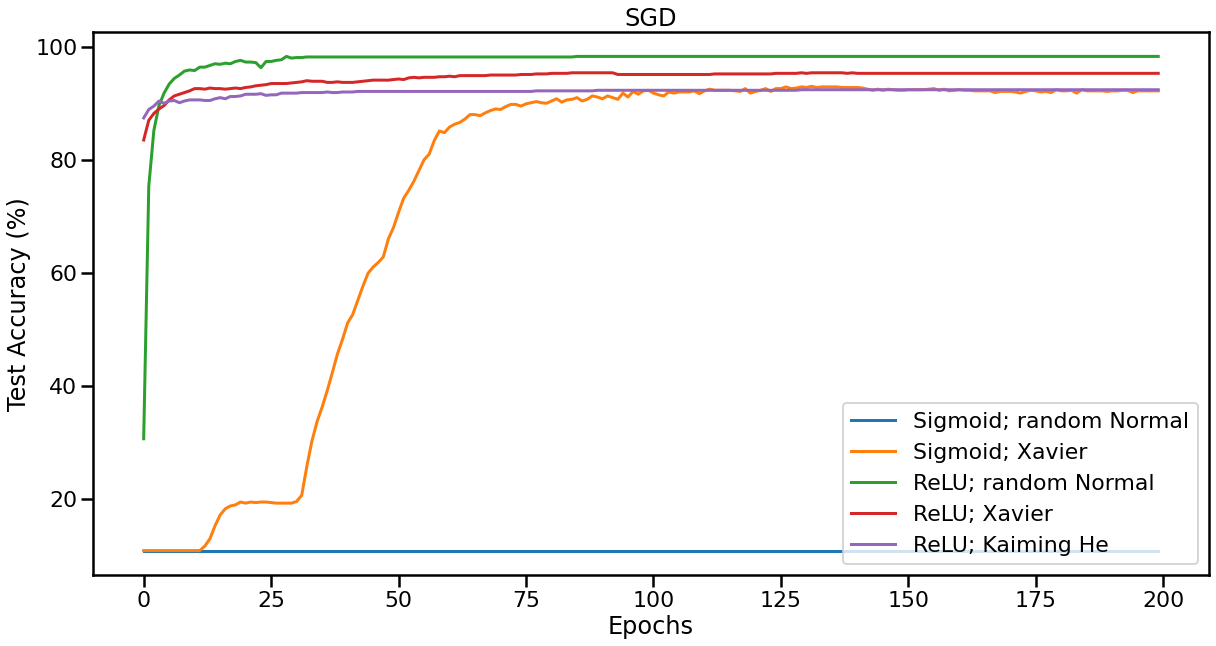

In [ ]:
plt.figure(figsize=(20,10))

for k, v in model_accuracy.items():
  plt.plot(v, label = k)

plt.title('SGD')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

> ## Adam

In [ ]:
# Create a dictionary to keep track of model accuracy
model_accuracy = {}

In [ ]:
# Train model A
model_accuracy = training_loop(model                = NeuralNetworkA(), 
                               model_name           = 'Sigmoid; random Normal',
                               opt                  = 'adam',
                               lr                   = 0.001,
                               epochs               = 200)

Epoch 10 || test accuracy: 92.20%
Epoch 20 || test accuracy: 93.70%
Epoch 30 || test accuracy: 95.20%
Epoch 40 || test accuracy: 96.00%
Epoch 50 || test accuracy: 95.80%
Epoch 60 || test accuracy: 97.10%
Epoch 70 || test accuracy: 96.90%
Epoch 80 || test accuracy: 96.50%
Epoch 90 || test accuracy: 97.00%
Epoch 100 || test accuracy: 96.20%
Epoch 110 || test accuracy: 97.40%
Epoch 120 || test accuracy: 97.00%
Epoch 130 || test accuracy: 96.80%
Epoch 140 || test accuracy: 97.10%
Epoch 150 || test accuracy: 96.90%
Epoch 160 || test accuracy: 97.70%
Epoch 170 || test accuracy: 97.70%
Epoch 180 || test accuracy: 97.10%
Epoch 190 || test accuracy: 97.50%
Epoch 200 || test accuracy: 97.50%


In [ ]:
# Train model B
model_accuracy = training_loop(model                = NeuralNetworkB(), 
                               model_name           = 'Sigmoid; Xavier',
                               opt                  = 'adam',
                               lr                   = 0.001,
                               epochs               = 200)

Epoch 10 || test accuracy: 84.40%
Epoch 20 || test accuracy: 84.70%
Epoch 30 || test accuracy: 88.60%
Epoch 40 || test accuracy: 87.20%
Epoch 50 || test accuracy: 86.10%
Epoch 60 || test accuracy: 87.90%
Epoch 70 || test accuracy: 89.80%
Epoch 80 || test accuracy: 87.30%
Epoch 90 || test accuracy: 88.80%
Epoch 100 || test accuracy: 88.00%
Epoch 110 || test accuracy: 87.60%
Epoch 120 || test accuracy: 88.80%
Epoch 130 || test accuracy: 88.90%
Epoch 140 || test accuracy: 85.40%
Epoch 150 || test accuracy: 86.70%
Epoch 160 || test accuracy: 88.60%
Epoch 170 || test accuracy: 88.10%
Epoch 180 || test accuracy: 87.10%
Epoch 190 || test accuracy: 85.90%
Epoch 200 || test accuracy: 86.10%


In [ ]:
# Train model C
model_accuracy = training_loop(model                = NeuralNetworkC(), 
                               model_name           = 'ReLU; random Normal',
                               opt                  = 'adam',
                               lr                   = 0.001,
                               epochs               = 200)

Epoch 10 || test accuracy: 98.40%
Epoch 20 || test accuracy: 98.60%
Epoch 30 || test accuracy: 98.00%
Epoch 40 || test accuracy: 98.70%
Epoch 50 || test accuracy: 97.70%
Epoch 60 || test accuracy: 97.90%
Epoch 70 || test accuracy: 98.60%
Epoch 80 || test accuracy: 98.20%
Epoch 90 || test accuracy: 98.40%
Epoch 100 || test accuracy: 98.20%
Epoch 110 || test accuracy: 98.10%
Epoch 120 || test accuracy: 98.00%
Epoch 130 || test accuracy: 98.20%
Epoch 140 || test accuracy: 98.00%
Epoch 150 || test accuracy: 97.60%
Epoch 160 || test accuracy: 98.30%
Epoch 170 || test accuracy: 98.00%
Epoch 180 || test accuracy: 98.30%
Epoch 190 || test accuracy: 98.50%
Epoch 200 || test accuracy: 97.90%


In [ ]:
# Train model D
model_accuracy = training_loop(model                = NeuralNetworkD(), 
                               model_name           = 'ReLU; Xavier',
                               opt                  = 'adam',
                               lr                   = 0.001,
                               epochs               = 200)

Epoch 10 || test accuracy: 96.40%
Epoch 20 || test accuracy: 96.80%
Epoch 30 || test accuracy: 97.80%
Epoch 40 || test accuracy: 97.70%
Epoch 50 || test accuracy: 97.90%
Epoch 60 || test accuracy: 98.30%
Epoch 70 || test accuracy: 98.30%
Epoch 80 || test accuracy: 98.00%
Epoch 90 || test accuracy: 97.80%
Epoch 100 || test accuracy: 95.20%
Epoch 110 || test accuracy: 97.70%
Epoch 120 || test accuracy: 98.30%
Epoch 130 || test accuracy: 95.90%
Epoch 140 || test accuracy: 98.10%
Epoch 150 || test accuracy: 97.50%
Epoch 160 || test accuracy: 97.40%
Epoch 170 || test accuracy: 97.40%
Epoch 180 || test accuracy: 97.60%
Epoch 190 || test accuracy: 98.20%
Epoch 200 || test accuracy: 97.90%


In [ ]:
# Train model E
model_accuracy = training_loop(model                = NeuralNetworkE(), 
                               model_name           = 'ReLU; Kaiming He',
                               opt                  = 'adam',
                               lr                   = 0.0001,
                               epochs               = 200)

Epoch 10 || test accuracy: 95.40%
Epoch 20 || test accuracy: 96.90%
Epoch 30 || test accuracy: 97.00%
Epoch 40 || test accuracy: 96.50%
Epoch 50 || test accuracy: 97.40%
Epoch 60 || test accuracy: 98.20%
Epoch 70 || test accuracy: 98.10%
Epoch 80 || test accuracy: 97.80%
Epoch 90 || test accuracy: 97.90%
Epoch 100 || test accuracy: 98.20%
Epoch 110 || test accuracy: 97.80%
Epoch 120 || test accuracy: 97.90%
Epoch 130 || test accuracy: 97.60%
Epoch 140 || test accuracy: 97.90%
Epoch 150 || test accuracy: 98.00%
Epoch 160 || test accuracy: 97.70%
Epoch 170 || test accuracy: 98.60%
Epoch 180 || test accuracy: 97.50%
Epoch 190 || test accuracy: 98.00%
Epoch 200 || test accuracy: 98.60%


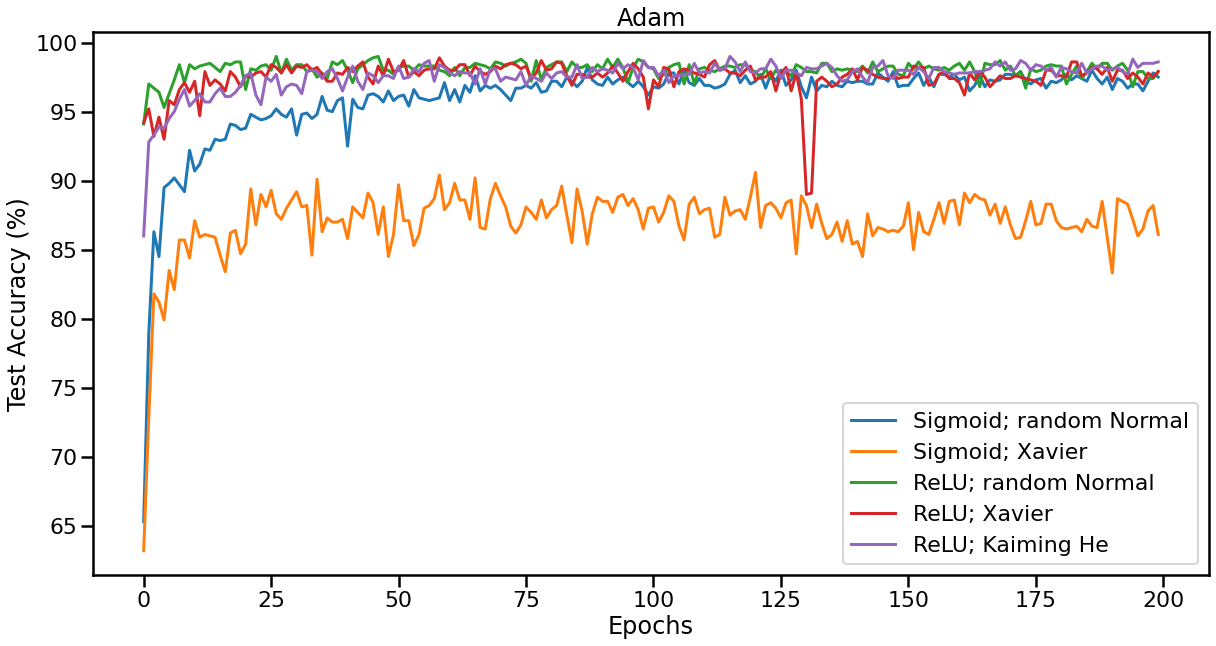

In [ ]:
plt.figure(figsize=(20,10))

for k, v in model_accuracy.items():
  plt.plot(v, label = k)

plt.title('Adam')
plt.ylabel('Test Accuracy (%)')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()